 # Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

 Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recoginzing the car in the front.

## Get the Data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaed file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-10-12 18:51:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.1.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   184MB/s    in 0.6s    

2021-10-12 18:51:40 (184 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the Data
And for a computer vision project... this usually means visualizing many samples of your data

In [ ]:
! ls pizza_steak

test  train


In [ ]:
import os

# Walk through pizza_steak direcctory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directions and {len(filenames)} images in '{dirpath}'.")

There are 2 directions and 1 images in 'pizza_steak'.
There are 2 directions and 1 images in 'pizza_steak/train'.
There are 0 directions and 750 images in 'pizza_steak/train/pizza'.
There are 0 directions and 750 images in 'pizza_steak/train/steak'.
There are 2 directions and 1 images in 'pizza_steak/test'.
There are 0 directions and 250 images in 'pizza_steak/test/pizza'.
There are 0 directions and 250 images in 'pizza_steak/test/steak'.


In [ ]:
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Oct 12 18:51 .
drwxr-xr-x 1 root root 4096 Oct 12 18:51 ..
-rw-r--r-- 1 root root 6148 Oct 12 18:51 .DS_Store
drwxr-xr-x 4 root root 4096 Oct 12 18:51 test
drwxr-xr-x 4 root root 4096 Oct 12 18:51 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get class names progammatically.

In [ ]:
# Get the classnames progammatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:] # remove .Ds_store
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup teh target directory (we will view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_img = random.sample(os.listdir(target_folder), 1)
  print(random_img)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}') # Show the shape of the image

  return img

['2087958.jpg']
Image shape: (512, 512, 3)


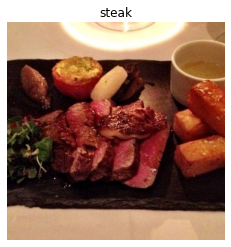

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='steak')

In [ ]:
img

array([[[211, 175, 139],
        [209, 174, 136],
        [207, 172, 134],
        ...,
        [159, 117,  69],
        [156, 114,  66],
        [159, 117,  69]],

       [[210, 175, 137],
        [208, 173, 135],
        [206, 171, 133],
        ...,
        [156, 114,  66],
        [157, 115,  67],
        [162, 120,  72]],

       [[208, 173, 135],
        [206, 171, 133],
        [205, 170, 132],
        ...,
        [155, 113,  65],
        [158, 116,  68],
        [161, 119,  71]],

       ...,

       [[202, 157, 126],
        [200, 157, 125],
        [201, 158, 124],
        ...,
        [207, 165, 123],
        [205, 163, 121],
        [202, 160, 118]],

       [[202, 157, 126],
        [199, 156, 124],
        [199, 156, 122],
        ...,
        [205, 163, 121],
        [204, 162, 120],
        [201, 159, 117]],

       [[202, 157, 126],
        [199, 154, 123],
        [198, 155, 121],
        ...,
        [205, 163, 121],
        [204, 162, 120],
        [202, 160, 118]]

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[211, 175, 139],
        [209, 174, 136],
        [207, 172, 134],
        ...,
        [159, 117,  69],
        [156, 114,  66],
        [159, 117,  69]],

       [[210, 175, 137],
        [208, 173, 135],
        [206, 171, 133],
        ...,
        [156, 114,  66],
        [157, 115,  67],
        [162, 120,  72]],

       [[208, 173, 135],
        [206, 171, 133],
        [205, 170, 132],
        ...,
        [155, 113,  65],
        [158, 116,  68],
        [161, 119,  71]],

       ...,

       [[202, 157, 126],
        [200, 157, 125],
        [201, 158, 124],
        ...,
        [207, 165, 123],
        [205, 163, 121],
        [202, 160, 118]],

       [[202, 157, 126],
        [199, 156, 124],
        [199, 156, 122],
        ...,
        [205, 163, 121],
        [204, 162, 120],
        [201, 159, 117]],

       [[202, 157, 126],
        [199, 154, 123],
        [198, 155, 121],
        ...,
        [205, 163, 12

In [ ]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/255

array([[[0.82745098, 0.68627451, 0.54509804],
        [0.81960784, 0.68235294, 0.53333333],
        [0.81176471, 0.6745098 , 0.5254902 ],
        ...,
        [0.62352941, 0.45882353, 0.27058824],
        [0.61176471, 0.44705882, 0.25882353],
        [0.62352941, 0.45882353, 0.27058824]],

       [[0.82352941, 0.68627451, 0.5372549 ],
        [0.81568627, 0.67843137, 0.52941176],
        [0.80784314, 0.67058824, 0.52156863],
        ...,
        [0.61176471, 0.44705882, 0.25882353],
        [0.61568627, 0.45098039, 0.2627451 ],
        [0.63529412, 0.47058824, 0.28235294]],

       [[0.81568627, 0.67843137, 0.52941176],
        [0.80784314, 0.67058824, 0.52156863],
        [0.80392157, 0.66666667, 0.51764706],
        ...,
        [0.60784314, 0.44313725, 0.25490196],
        [0.61960784, 0.45490196, 0.26666667],
        [0.63137255, 0.46666667, 0.27843137]],

       ...,

       [[0.79215686, 0.61568627, 0.49411765],
        [0.78431373, 0.61568627, 0.49019608],
        [0.78823529, 0

## An end-to-end example 

Let's build a CNN to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess the data (get all the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"


# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN mode (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding='valid'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')                                               
])

# Compile the CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 43s 254ms/step - loss: 0.6119 - accuracy: 0.6467 - val_loss: 0.3884 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4320 - accuracy: 0.8067 - val_loss: 0.3654 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4119 - accuracy: 0.8180 - val_loss: 0.3766 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3749 - accuracy: 0.8487 - val_loss: 0.3115 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3476 - accuracy: 0.8453 - val_loss: 0.3408 - val_accuracy: 0.8500


**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you are using GPU by going to runtime type -> Hardware Accerator -> GPU

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
tf.random.set_seed(42)

# Create a model to replicate tensorflow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')                
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 211ms/step - loss: 0.7026 - accuracy: 0.5073 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly...let's try 

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),                            
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),                               
  tf.keras.layers.Dense(100, activation='relu'),                               
  tf.keras.layers.Dense(1, activation='sigmoid'),                               
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 2.0537 - accuracy: 0.6553 - val_loss: 2.5406 - val_accuracy: 0.5160
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 1.0489 - accuracy: 0.7053 - val_loss: 1.4137 - val_accuracy: 0.5320
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.8591 - accuracy: 0.7100 - val_loss: 0.7132 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.7147 - accuracy: 0.7193 - val_loss: 0.6124 - val_accuracy: 0.7300
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4216 - accuracy: 0.8220 - val_loss: 0.4696 - val_accuracy: 0.7920


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification : Let's break it down

1. Become one with the data
2. Preprocess the data
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
4. Repeat unitl satisfied.

## Become one with the data

['1594719.jpg']
Image shape: (512, 512, 3)
['3281494.jpg']
Image shape: (288, 512, 3)


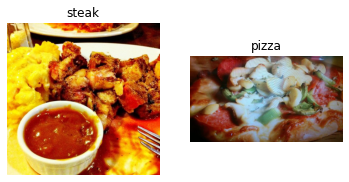

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

## Preprocess the data(prepare it for a model)

In [ ]:
# Define our directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model only look at 32 at a time.
it does for a couple of reasons:
1. 10,000 images might not fit into the memory or your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

why 32?
Because 32 is good for your health... 

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # Get the next batch of images/lables in train_data
len(images),len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a CNN Model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [ ]:
# Make the creating of our model a little easiar
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding window across an input
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid')  # output layer working with binary clasification so only 1 output neuron                             
])

# compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [ ]:
# Get the model summary
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_4 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 4. Fit the model

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # Combinationof X and y
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 251ms/step - loss: 1.0844 - accuracy: 0.6693 - val_loss: 0.5340 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4198 - accuracy: 0.8240 - val_loss: 0.3888 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 11s 235ms/step - loss: 0.2911 - accuracy: 0.8907 - val_loss: 0.3864 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 11s 235ms/step - loss: 0.1486 - accuracy: 0.9587 - val_loss: 0.4248 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.0564 - accuracy: 0.9887 - val_loss: 0.3881 - val_accuracy: 0.8360


## 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

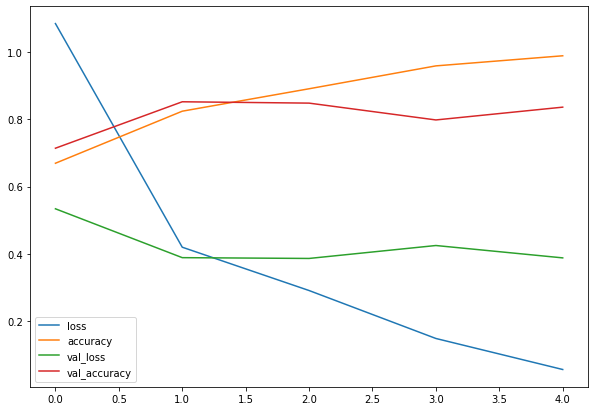

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Plot the validattion and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))


  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This mean, it's learning the patterns **too well** and thus the model's ability to generalize to unseen data will be diminished.

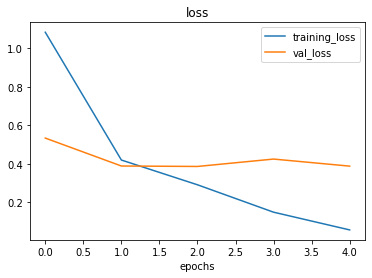

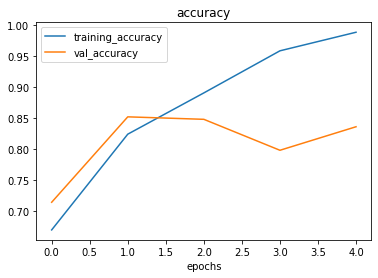

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

## 6. Adjust the model parameters

Fitting a machine learnin model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce  overfitting

Way to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layers to the output of our flattened layers

Reduce overfitting:
* Add data augmentations
* Add regularization layers



**Note:** Reducing overfitting is also known as Regularization.

In [ ]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')                   
])

# Compile the model
model_5.compile(loss='binary_crossentropy', 
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 0.6323 - accuracy: 0.6567 - val_loss: 0.4902 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4477 - accuracy: 0.8053 - val_loss: 0.3550 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3961 - accuracy: 0.8347 - val_loss: 0.3225 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3712 - accuracy: 0.8387 - val_loss: 0.3623 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3500 - accuracy: 0.8480 - val_loss: 0.3113 - val_accuracy: 0.8860


In [ ]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)             

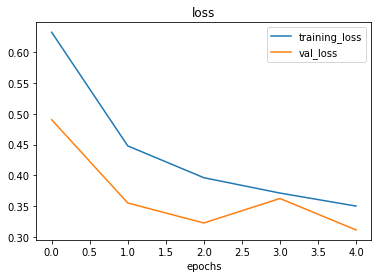

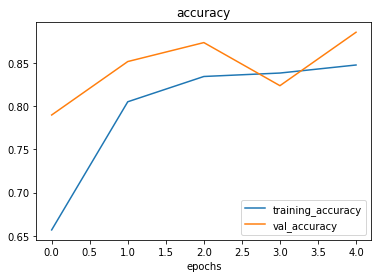

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                               rotation_range=0.2,
                                               shear_range=0.2,
                                               zoom_range=0.2,
                                               width_shift_range=0.2,
                                               height_shift_range=0.2,
                                               horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                       target_size=(224, 224),
                                                                       batch_size=32,
                                                                       class_mode='binary',
                                                                       shuffle=False)

# Create non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

IMG_SIZE = (224, 224)

# Create non-augmented test data batches
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary')


Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**Note** Data augmentation is usually only performed on the training data.
Using **ImageDataGenerator** built-in data augmentation parameters our images are left as they are in the directory but are modified as they are loaded into the model.

In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: lables aren't augmented only data iamges

showing image nubmer: 11


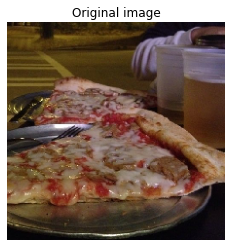

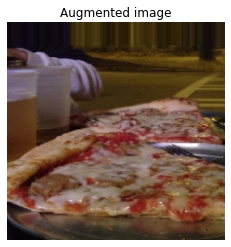

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31)
print(f'showing image nubmer: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False);

Now we have seen what augmented training data looks like, let's build a model and how it learns from augmented data

In [ ]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')                     
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 26s 550ms/step - loss: 0.7479 - accuracy: 0.5407 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 26s 544ms/step - loss: 0.6870 - accuracy: 0.5613 - val_loss: 0.6703 - val_accuracy: 0.5160
Epoch 3/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6809 - accuracy: 0.5407 - val_loss: 0.6526 - val_accuracy: 0.6880
Epoch 4/5
47/47 [==============================] - 26s 547ms/step - loss: 0.6770 - accuracy: 0.5987 - val_loss: 0.6149 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 26s 550ms/step - loss: 0.6316 - accuracy: 0.6633 - val_loss: 0.6031 - val_accuracy: 0.6260


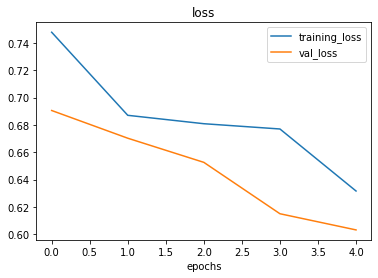

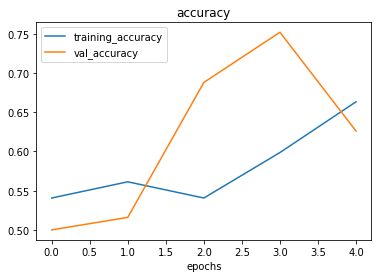

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                          target_size=(224, 224),
                                                                          class_mode='binary',
                                                                          batch_size=32,
                                                                          shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 225, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 553ms/step - loss: 0.6672 - accuracy: 0.5927 - val_loss: 0.5688 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 26s 548ms/step - loss: 0.5738 - accuracy: 0.6973 - val_loss: 0.4384 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 26s 551ms/step - loss: 0.5208 - accuracy: 0.7493 - val_loss: 0.4839 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 26s 552ms/step - loss: 0.5124 - accuracy: 0.7607 - val_loss: 0.4043 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 26s 552ms/step - loss: 0.4951 - accuracy: 0.7687 - val_loss: 0.3694 - val_accuracy: 0.8220


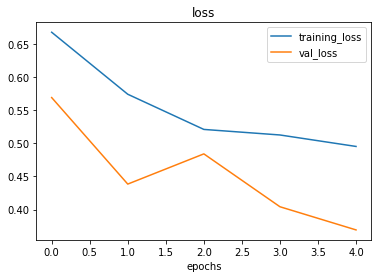

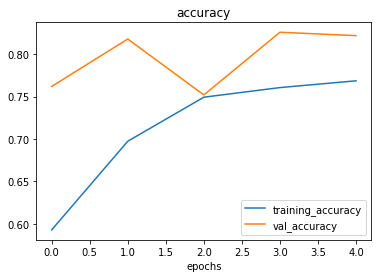

In [ ]:
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of iamges(in our cases, pizza and steak at the same time instead of just pizza then steak).

## 7. Repeat until satisfied

Since we have aleardy beaten our baseline, there are few things we could try to continue to improve our model:

* Increase the number of model layers (e. g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more oppurtunities to learn)
* Use ** transfer learning** to leverage what another image model has learned add adjust it for our own case

**Note** Recreate the model on the CNN explainer website (same as model_1) and see how it performes on augmented shuffled training data.

## Making a prediction with a trained model on our own custom data

In [ ]:
# Classes we are working with
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example imag
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2021-10-12 20:40:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-10-12 20:40:44 (32.2 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

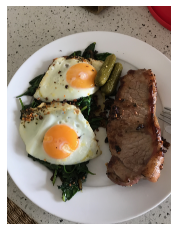

In [ ]:
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data than your own custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (from 0 to 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

Looks like our custom image is being put through our model, however, it currently outputs a prediction visualize the image as well as the model's prediction.

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  
  """

  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

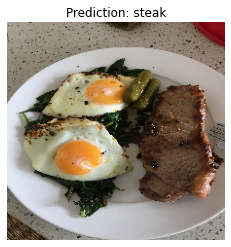

In [ ]:
pred_and_plot(model_7, '03-steak.jpeg')

Our model works! Let's try it on another image... this time pizza

--2021-10-12 21:07:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-10-12 21:07:31 (43.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



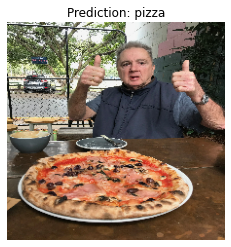

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, '03-pizza-dad.jpeg')

## Multi-class Image Classification

We have just been through a bunch of the following steps with a **Binary classification** problem, now we are going to step into the **Multi-class Classification**.

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (starts with the baseline)
4. Fit the model
5. Evaluate the mode.
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Improve and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2021-10-12 21:15:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.132.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  75.3MB/s    in 5.9s    

2021-10-12 21:15:52 (83.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 1

In [ ]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['332231.jpg']
Image shape: (382, 512, 3)


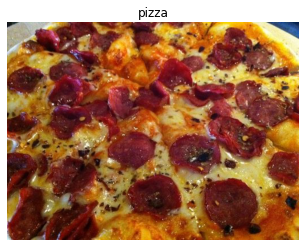

In [ ]:
# Vizualize, vizualize, vizualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names),)


In [ ]:
random.choice(class_names)

'steak'

## 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/225.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)
We have been talking a lot about the CNN explainer website... how about we just take their model and use it for our problem.

In [ ]:
# Create our model (very similar to previous model but acutally from CNN Explianer)
model_8 = Sequential([
 Conv2D(10, 3, input_shape=(224, 224, 3)),
 Activation(activation='relu'),
 Conv2D(10, 3, activation='relu'),
 MaxPool2D(),
 Conv2D(10, 3, activation='relu'),
 Conv2D(10, 3, activation='relu'),
 MaxPool2D(),
 Flatten(),
 Dense(10, activation='softmax'),              
])

# compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


## 4. Fit the model

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 242ms/step - loss: 2.1326 - accuracy: 0.2232 - val_loss: 2.0221 - val_accuracy: 0.3012
Epoch 2/5
235/235 [==============================] - 56s 237ms/step - loss: 1.8232 - accuracy: 0.3767 - val_loss: 1.8639 - val_accuracy: 0.3336
Epoch 3/5
235/235 [==============================] - 56s 237ms/step - loss: 1.3125 - accuracy: 0.5645 - val_loss: 1.9535 - val_accuracy: 0.3372
Epoch 4/5
235/235 [==============================] - 56s 240ms/step - loss: 0.5443 - accuracy: 0.8331 - val_loss: 2.5500 - val_accuracy: 0.2976
Epoch 5/5
235/235 [==============================] - 56s 240ms/step - loss: 0.1486 - accuracy: 0.9591 - val_loss: 3.7291 - val_accuracy: 0.3004


## 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 3.7291 - accuracy: 0.3004


[3.729081630706787, 0.3003999888896942]

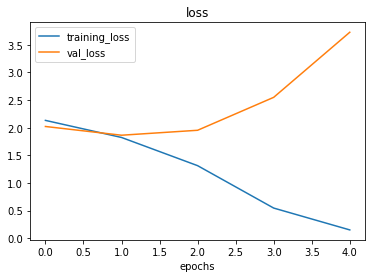

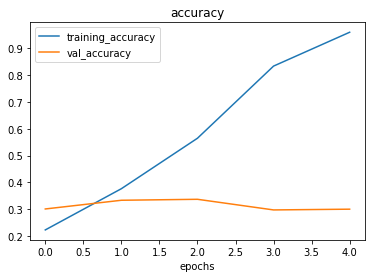

In [ ]:
# Check out the model's loss curves
plot_loss_curves(history=history_8)

What do these loss curves tell us?

Well... it seems our model is **Overfitting** the training set quite badly...in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

## 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to it's performance on the training data, it's claar our model is learning something...
However, it's not gerneralizing well to unseen data (overfitting).

so, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our curent model is overfitting the data, it may be too complicated of a model , one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it. (without altering teh original data)
* **Use Transfer Learning** - Transfer Learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your dataset.

In [ ]:
# How about we try and simplify the model first
# Let's try to remove to 2 Conv.. layers

model_9 = Sequential([
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')                      
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 214ms/step - loss: 2.0864 - accuracy: 0.2599 - val_loss: 1.9446 - val_accuracy: 0.3204
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 1.7756 - accuracy: 0.3963 - val_loss: 1.8835 - val_accuracy: 0.3432
Epoch 3/5
235/235 [==============================] - 49s 210ms/step - loss: 1.4155 - accuracy: 0.5305 - val_loss: 1.9351 - val_accuracy: 0.3408
Epoch 4/5
235/235 [==============================] - 49s 210ms/step - loss: 0.9624 - accuracy: 0.7009 - val_loss: 2.0862 - val_accuracy: 0.3284
Epoch 5/5
235/235 [==============================] - 50s 212ms/step - loss: 0.5445 - accuracy: 0.8435 - val_loss: 2.5482 - val_accuracy: 0.2812


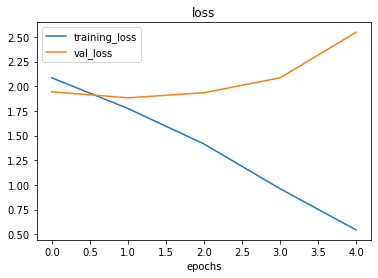

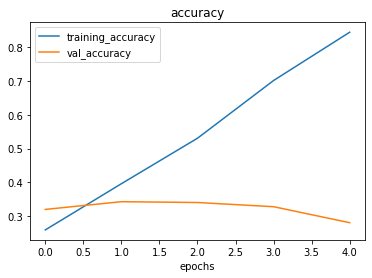

In [ ]:
# Check out the loss curves 
plot_loss_curves(history=history_9)

In [ ]:
model_9.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, None, None, 10)    280       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, None, None, 10)    0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, None, None, 10)    910       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, None, None, 10)    0         
_________________________________________________________________
flatten_13 (Flatten)         (None, None)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

Looks liek our "simplyfying the model" experiment didn't work... the accuracy went down and overfitting occured

How about we try data augmentation

## Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...
Ideally , we want to:
* Reduce overfitting
* Improve validation accuracy

In [ ]:
# Create an augmented data generator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but this time we will fit it on the augmented training data of 10 classes

model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 131s 555ms/step - loss: 2.2674 - accuracy: 0.1379 - val_loss: 2.1232 - val_accuracy: 0.2116
Epoch 2/5
235/235 [==============================] - 131s 558ms/step - loss: 2.1225 - accuracy: 0.2289 - val_loss: 1.9886 - val_accuracy: 0.2864
Epoch 3/5
235/235 [==============================] - 130s 552ms/step - loss: 2.0656 - accuracy: 0.2629 - val_loss: 2.0086 - val_accuracy: 0.3068
Epoch 4/5
235/235 [==============================] - 129s 547ms/step - loss: 2.0274 - accuracy: 0.2820 - val_loss: 1.9536 - val_accuracy: 0.3348
Epoch 5/5
235/235 [==============================] - 128s 545ms/step - loss: 1.9723 - accuracy: 0.3125 - val_loss: 1.9886 - val_accuracy: 0.3432


In [ ]:
model_8.evaluate(test_data)

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 157ms/step - loss: 1.9886 - accuracy: 0.3432


[1.9885746240615845, 0.3431999981403351]

In [ ]:
plot_loss_curves(history_10)

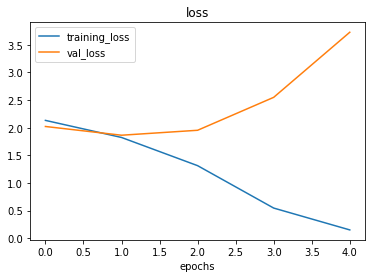

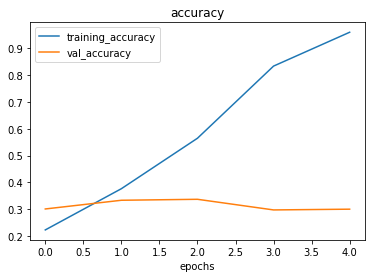

In [ ]:
plot_loss_curves(history_8)

## 7. Repeat unitl satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation / test accuracy.

How?

By running los of experments, namesly:
* restructuring our model's architecture (increase layers/hidden units)
* adjust the learning rate
* try different method of the data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
* try **Transfer Learning**

## Making a prediction with our trained model

Let's use our trained model to make some prediction on our own custom images!

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-10-12 22:49:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.06s   

2021-10-12 22:49:31 (29.7 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

--2021-10-12 22:49:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response...

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  
  """

  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names(int(tf.round(pred[0])))  

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

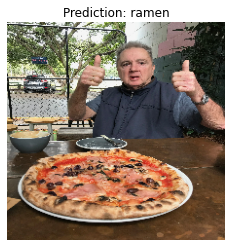

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

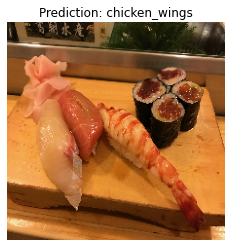

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename='03-sushi.jpeg',
              class_names=class_names)

## Saving and Laoding our model

In [ ]:
# Save a model
model_10.save('saved_trained_model_10')

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 1.9886 - accuracy: 0.3432


[1.9885752201080322, 0.3431999981403351]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 1.9886 - accuracy: 0.3432


[1.9885743856430054, 0.3431999981403351]